In [106]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
from __future__ import division
import numpy as np
c = 3e8
G = 6.67e-11
Msolar = 2e30
AU = 1.49e11 #meters
pc = 3.086e16 #parsec in m

The following parameters can be set:

$m_{0,1,2}$ masses of each of components (0,1 = inner, 2 = outer)

$f$ = orbital frequency of inner binary

$e_1$ = initial eccentricity of inner binary

$e_2$ = orbital eccentricity of outer binary

$I$ = orbital inclination

$\gamma$ = initial pericentre angle

$\beta = a_2/a_1$ where $a_{1,2}$ is the semi-major axis of the inner/outer binary

In [108]:
%matplotlib inline
import OrbitalMotion as orb
from plot import *
import waveform

#Set up initial system parameters
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
e1 = 0.5 #eccentricity
beta=10
m2 = 10*Msolar
e2 =0.6
I = 60 * np.pi/180.0 #Inclination
gamma = np.pi/4
nmodes = 20 #number of modes to sum over for GW
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 
D = 1e6 * pc #distance from source to observer 1Mpc

#And some integration parameters
Tint = 0.1 #years 0.01
#Tres = int(9e4) #Effective timing resolution. Bigger numbers = better
fs = 2 #effective sampling frequency

max_f = fs/2
min_f = 1 / (Tint * 365*24*3600)

print (min_f, max_f)

3.170979198376459e-07 1.0


In [109]:
#ANALYTICAL SOLUTION

#Get the orbital motion
motion = orb.get_orbital_evolution(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,fs)

#Generate the waveform
constants = np.array([m0+m1, nmodes,iota,m0*m1/(m0+m1),D])
grav = waveform.GW(motion,constants)
print ('Completed')


Getting the orbit
Getting the waveform
Completed


Plotting the orbital parameter evolution
Plotting the GW


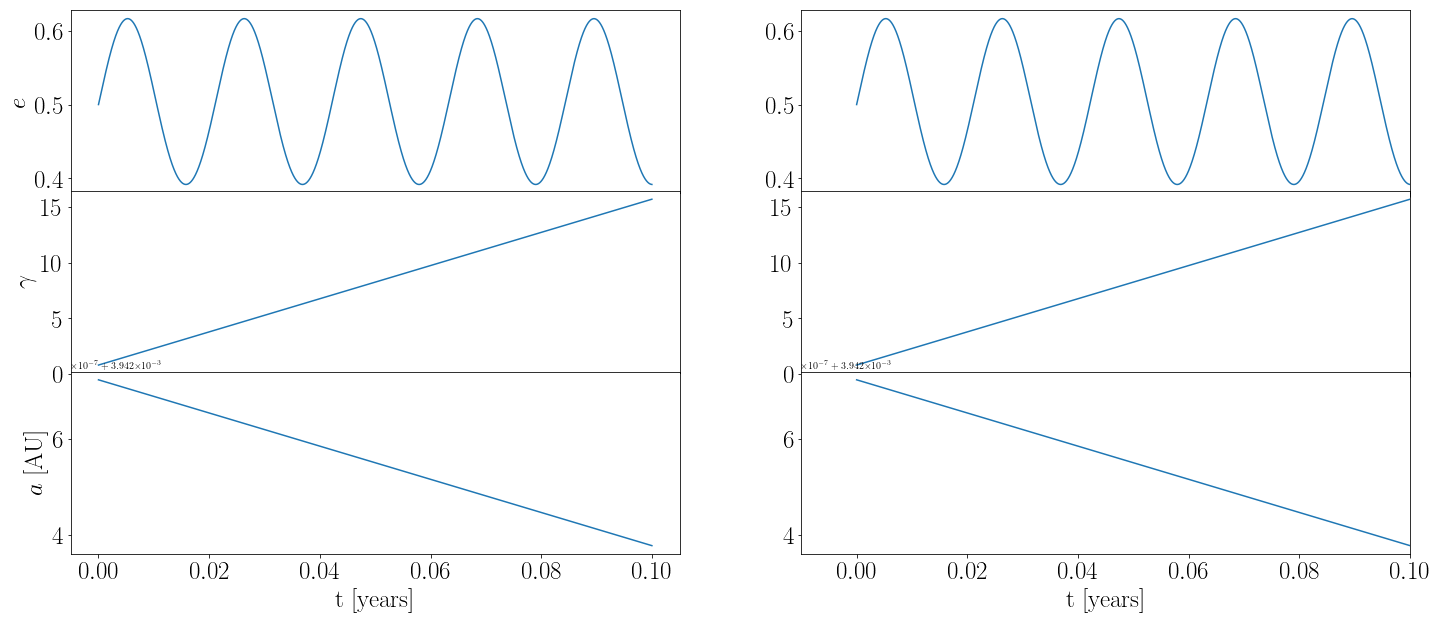

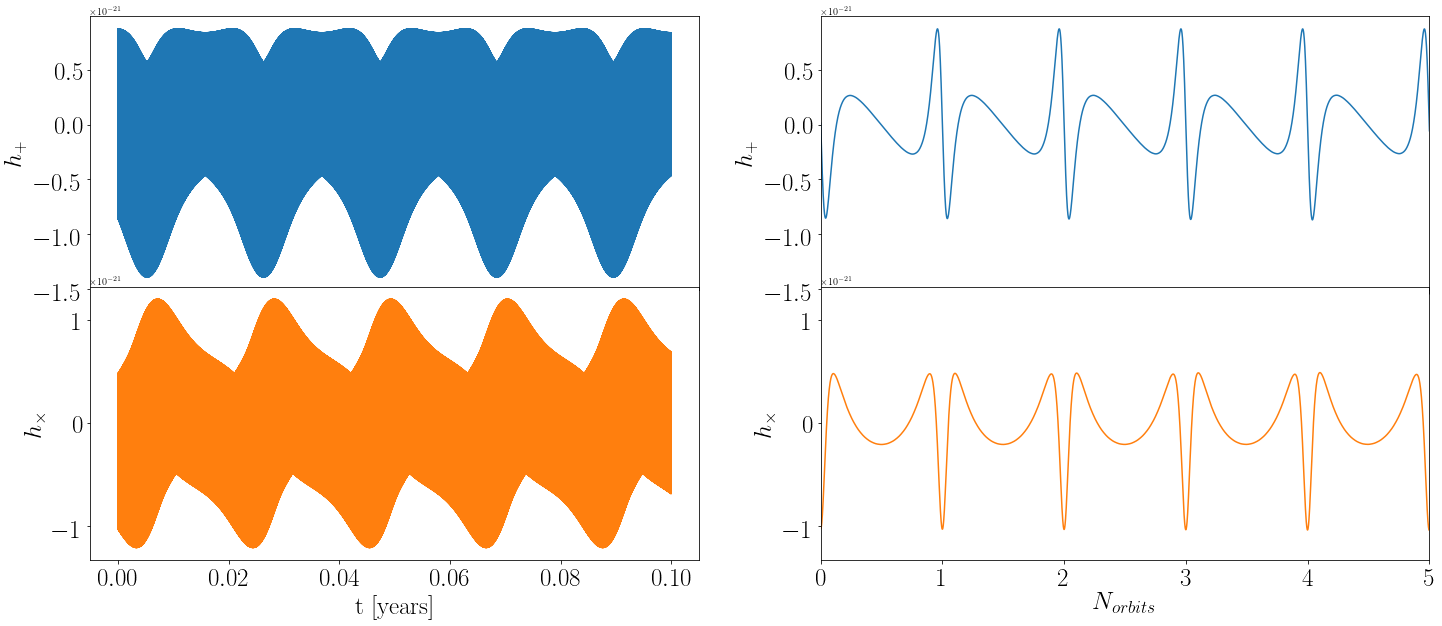

In [110]:
plot_motion(motion) #Plot it if you fancy
plot_GW(grav,f1)

In [111]:
#NUMERICAL SOLUTION

#Get the orbital motion
numerical_motion = orb.get_orbital_evolution_numerical(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,fs)
#plot_motion(numerical_motion)# Plot it if you fancy

#Generate the waveform
constants = np.array([m0+m1, nmodes,iota,m0*m1/(m0+m1),D])
grav_numerical = waveform.GW(numerical_motion,constants)
#plot_GW(grav_numerical,f1)

Numerical evolution has completed
Getting the waveform


Plotting the orbital parameter evolution
Plotting the GW


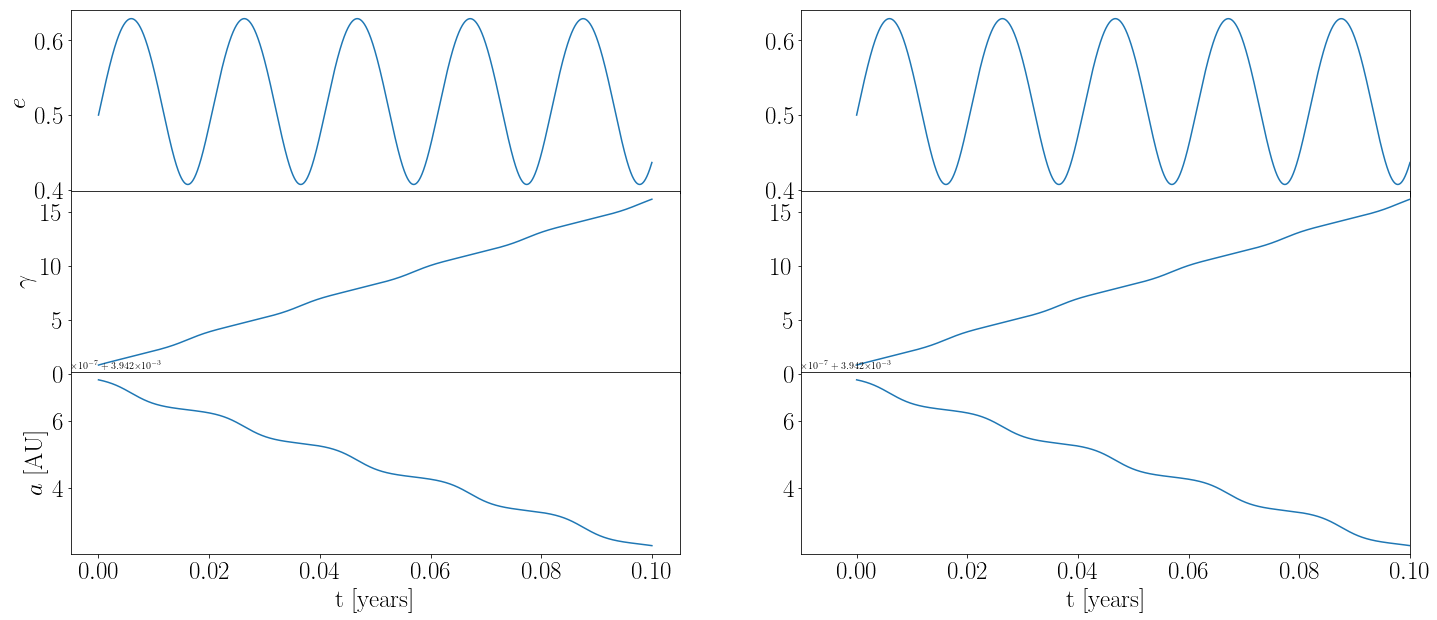

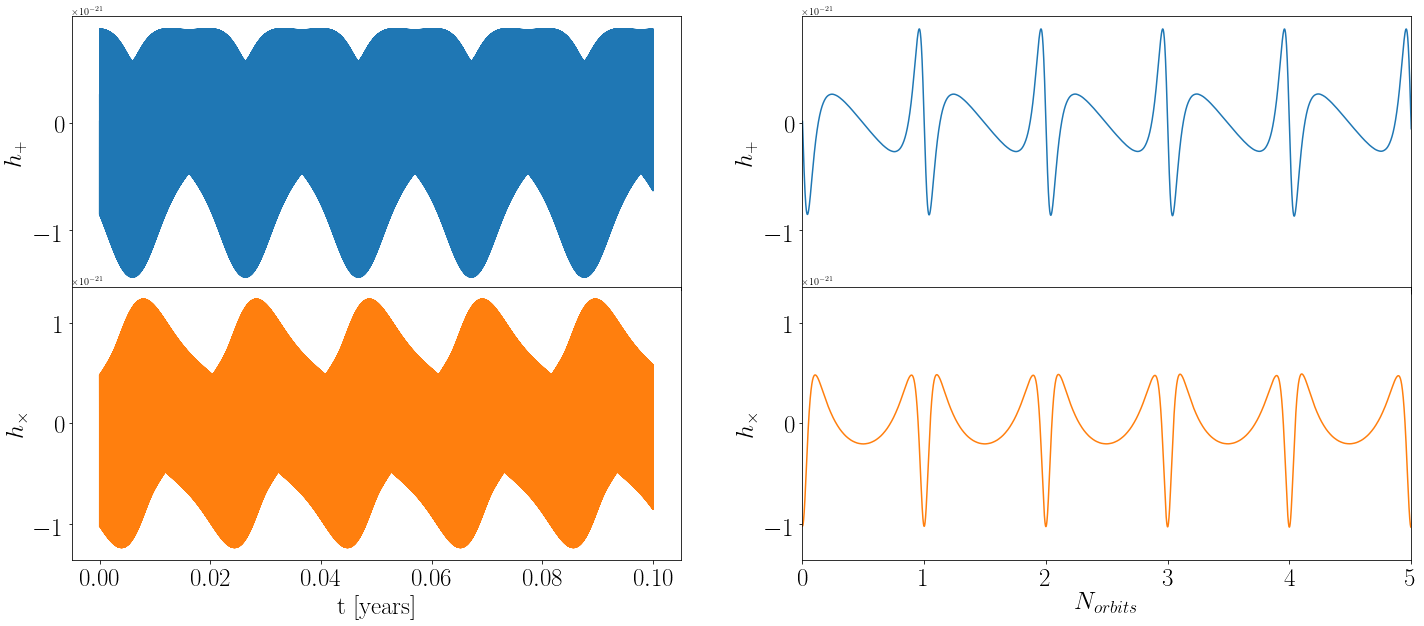

In [112]:
plot_motion(numerical_motion)# Plot it if you fancy
plot_GW(grav_numerical,f1)

Define the overlap of the function as,

$$ (a|b) = 2 \int^{\infty}_0 \frac{\tilde{a}^*(f)\tilde{b}(f)+\tilde{b}^*(f)\tilde{a}(f)}{P_n(f)} df \ , $$


We can now also compare the orbital evolution in the numerical and analytical cases

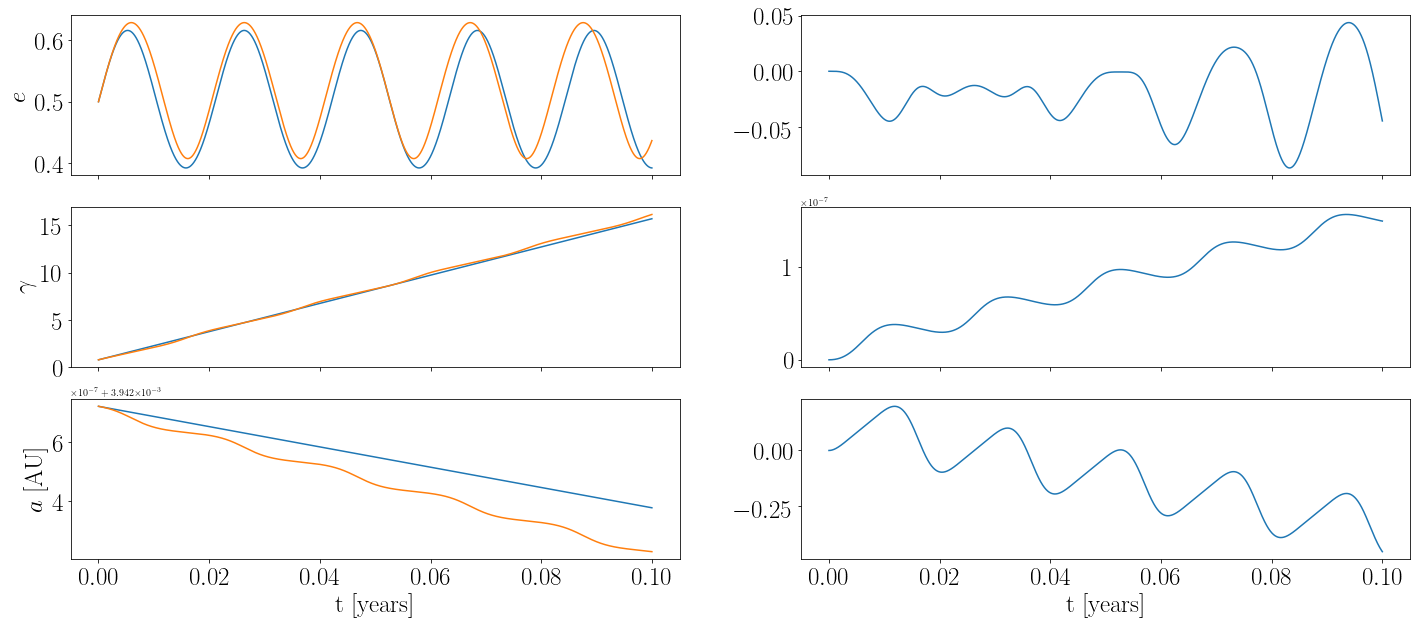

In [113]:
plot_compare_motion(motion,numerical_motion)

2.0
2.0
overlap =  0.8976645778051294


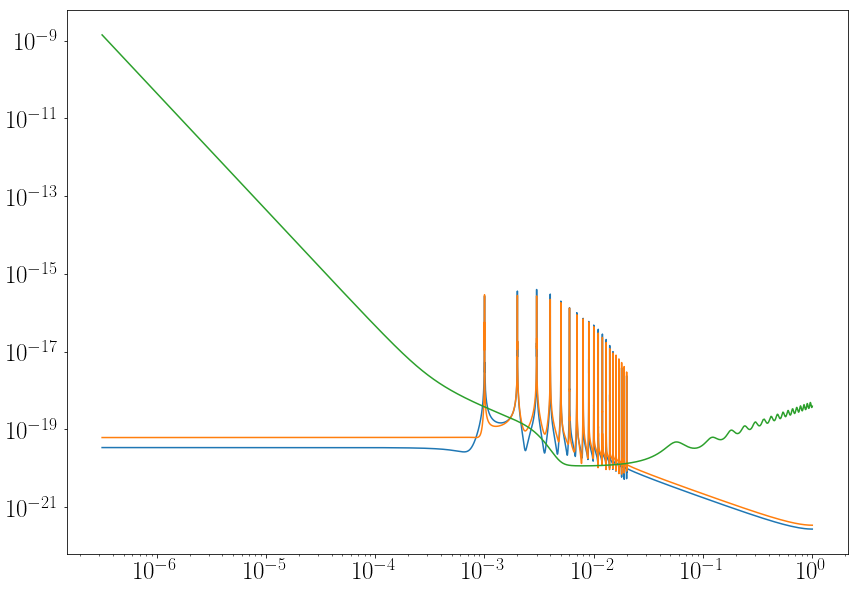

In [114]:
from overlap import overlap

f,h1,h2, S = overlap(grav,grav_numerical)
plot_GW_frequency(f,h1,h2, S)